例によって[こちら](http://qiita.com/ashitani/items/1dc0a54da218ec224ad8)をpytorchで実装。

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def get_batch(n):
    x = np.random.random(n)
    y = np.exp(x)
    return x,y

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        y1= self.fc1(x)
        h1=F.elu(y1)
        h2=F.elu( self.fc2(h1))
        h3=F.elu( self.fc3(h2))
        return h3
    
    def get(self,x):
        return model(Variable(torch.from_numpy(np.asarray([x],dtype=np.float32)))).item()
    

In [5]:
model = Net()
optimizer = optim.Adam(model.parameters())

losses =[]
for i in range(3000):
    x,y = get_batch(100)
    x_= Variable(torch.from_numpy(x.astype(np.float32).reshape(100,1,1)))
    t_= Variable(torch.from_numpy(y.astype(np.float32).reshape(100,1,1)))
    
    optimizer.zero_grad()
    output = model(x_)
    mseloss = nn.MSELoss()
    loss=mseloss(output,t_)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

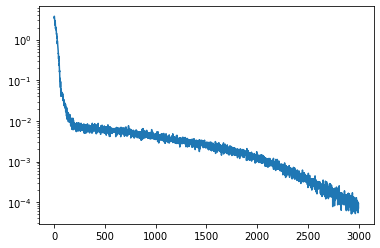

In [6]:
plt.plot(losses)
plt.yscale('log')

In [7]:
model.get(0.1),np.exp(0.1)

(1.1007089614868164, 1.1051709180756477)

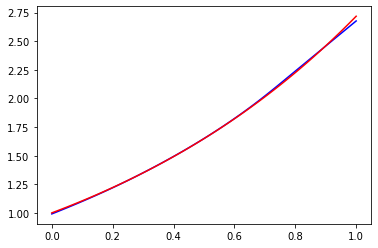

In [8]:
xs=np.linspace(0,1,100)
ys_predict=[]
ys=[]
for x in xs:
    ys_predict.append(model.get(x))
    ys.append(np.exp(x))

plt.plot(xs,ys_predict,"b-")
plt.plot(xs,ys,"r-")